<h2>In this section will import all needed libraries</h2>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 
import ast
from collections import Counter

<h2>In this section will import data and explore the properties of data</h2>

In [3]:
file_path = r'../data/rails_issues.csv'
df = pd.read_csv(file_path)
df

,id,number,title,description,labels,comments,author,created_at,state
0,2661216314,53649,db:drop db:create db:migrate - run only differ...,"When I do `db:drop`, the **database is deleted...",[],2,kubatron117,2024-11-15T08:33:54Z,open
1,2660906300,53648,Active model serializer is not working on Rails 8,### Steps to reproduce\r\n1. install `active_m...,[],5,anthonylee1994,2024-11-15T06:16:31Z,closed
2,2660517937,53646,Help me pleas,NaN,[],0,Madesupra27,2024-11-15T02:14:12Z,closed
3,2660462567,53645,Skip annotation in the page title,### Steps to reproduce\r\nWhen rendering a vie...,[],0,huda-kh,2024-11-15T01:13:39Z,open
4,2658844435,53638,find_each with model repressing a view raise e...,Hello 👋 \r\n\r\nBumping from rails 7.2 to rail...,[],6,aandrieu,2024-11-14T13:34:39Z,closed
...,...,...,...,...,...,...,...,...,...
5341,420300746,35597,Rails bi-directional accepts_nested_attributes...,### Steps to reproduce\r\nLet's say I have 2 m...,"['activerecord', 'stale']",6,hashwin,2019-03-13T03:29:42Z,closed
5342,420244243,35594,Fix random test failure in Active Record i18n ...,This test fails:\r\n\r\n```\r\n# Running:\r\n\...,['good first issue'],4,kaspth,2019-03-12T23:04:28Z,closed
5343,420214598,35592,Unable to use partial locals when using 'rende...,Consider the following two ways of rendering a...,[],1,taylorthurlow,2019-03-12T21:29:48Z,closed
5344,420207317,35590,ActionCable requests High Response Time,High Response Time on `/cable` endpoint when u...,[],6,cesar3030,2019-03-12T21:10:28Z,closed


In [4]:
df.columns

Index(['id', 'number', 'title', 'description', 'labels', 'comments', 'author',
       'created_at', 'state'],
      dtype='object')

In [5]:
df.isna().any()

id             False
number         False
title          False
description     True
labels         False
comments       False
author         False
created_at     False
state          False
dtype: bool

In [6]:
# Convert the 'labels' column to actual lists and filter for empty lists
df['labels'] = df['labels'].apply(ast.literal_eval)

In [7]:
# Convert 'created_at' column to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])

In [8]:
df_empty_labels = df[df['labels'].apply(lambda x: len(x) == 0)]
print(df_empty_labels)

              id  number                                              title  \
0     2661216314   53649  db:drop db:create db:migrate - run only differ...   
1     2660906300   53648  Active model serializer is not working on Rails 8   
2     2660517937   53646                                      Help me pleas   
3     2660462567   53645                  Skip annotation in the page title   
4     2658844435   53638  find_each with model repressing a view raise e...   
...          ...     ...                                                ...   
5332   421303789   35616                                               Lyme   
5339   420448929   35602  Cache_store not set when using ActionCtrl::API...   
5343   420214598   35592  Unable to use partial locals when using 'rende...   
5344   420207317   35590            ActionCable requests High Response Time   
5345   420196694   35589                                              clear   

                                            descrip

<h3>Analyzing labels and getting most popular category</h3>

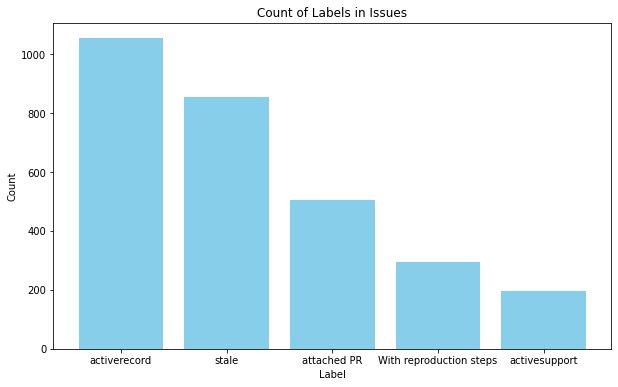

In [9]:
df_non_empty_labels = df[df['labels'].apply(lambda x: len(x) != 0)]
all_labels = [label for sublist in df['labels'] for label in sublist]
label_counts = Counter(all_labels)
label_counts_df = pd.DataFrame(label_counts.items(), columns=['Label', 'Count'])
top_5_labels = label_counts_df.sort_values(by='Count', ascending=False).head(5)


plt.figure(figsize=(10, 6))
plt.bar(top_5_labels['Label'], top_5_labels['Count'], color='skyblue')


plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count of Labels in Issues')


plt.savefig('../plots/Count of Labels in Issues.png')
plt.show()

<h3>Analyzing issues evolvement over time</h3>

In [10]:
# Group by date (extract just the date part from 'created_at') and count the issues per day
df['year_month'] = df['created_at'].dt.to_period('M')
issue_counts_per_date = df.groupby('year_month').size()
issue_counts_per_date

C:\Users\yjarrar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


year_month
2019-03    77
2019-04    99
2019-05    74
2019-06    82
2019-07    81
           ..
2024-07    55
2024-08    92
2024-09    91
2024-10    90
2024-11    37
Freq: M, Length: 69, dtype: int64

In [11]:
# Calculate mean, median, and mode
mean_value = issue_counts_per_date.mean()
median_value = issue_counts_per_date.median()
mode_value = issue_counts_per_date.mode()[0]

print(f'Mean is: {mean_value}')
print(f'Median is: {median_value}')
print(f'Mode month is: {mode_value}')

Mean is: 77.47826086956522
Median is: 74.0
Mode month is: 63


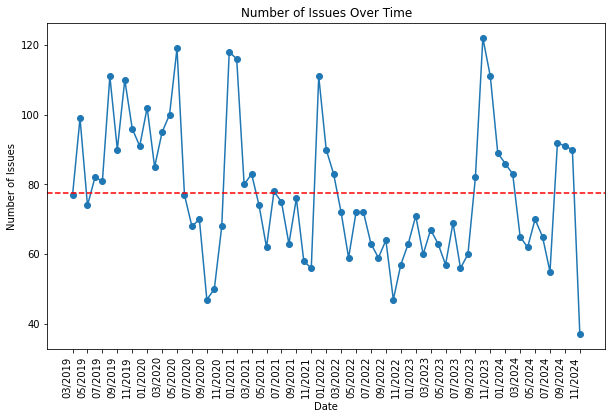

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(issue_counts_per_date.index.strftime("%m/%Y"), issue_counts_per_date.values, marker='o')
plt.xticks(rotation=90, ha='right')
# Reduce number of ticks on x-axis (showing every 2nd or 3rd label)
plt.xticks(range(0, len(issue_counts_per_date), 2))
plt.axhline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.xlabel('Date')
plt.ylabel('Number of Issues')
plt.title('Number of Issues Over Time')

plt.savefig('../plots/Number of Issues Over Time.png')
plt.show()

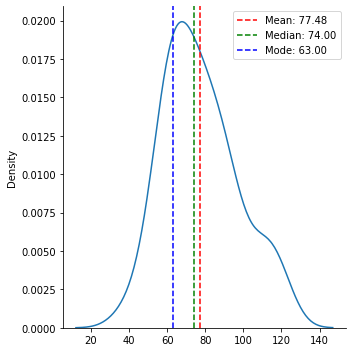

C:\Users\yjarrar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


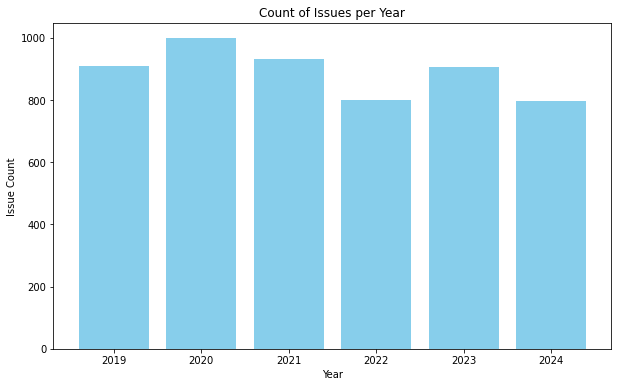

In [20]:
sns.displot(issue_counts_per_date, kind="kde")
plt.axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='g', linestyle='--', label=f'Median: {median_value:.2f}')
plt.axvline(mode_value, color='b', linestyle='--', label=f'Mode: {mode_value:.2f}')

plt.legend()

plt.savefig('../plots/Issues Statistics.png')

plt.show()


df['year'] = df['created_at'].dt.to_period('Y')

# Group by 'year' and count the occurrences
issue_counts_per_year = df.groupby('year').size()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(issue_counts_per_year.index.astype(str), issue_counts_per_year.values, color='skyblue')

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Issue Count')
plt.title('Count of Issues per Year')

# Save the plot
plt.savefig('../plots/Count_of_Issues_Per_Year.png')
plt.show()

<h2>Analyizing user issues</h2>

              Author  Count
0        kubatron117      1
1     anthonylee1994      1
2        Madesupra27      1
3            huda-kh      1
4           aandrieu      2
...              ...    ...
3402     allenwu1973      1
3403         hashwin      1
3404   taylorthurlow      1
3405       cesar3030      1
3406     melaniemohn      1

[3407 rows x 2 columns]


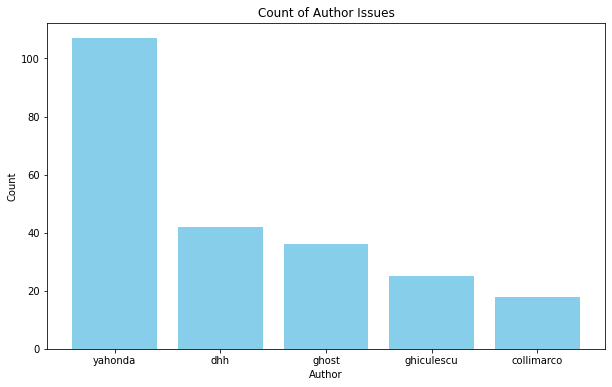

In [14]:
all_authors = df['author']
author_counts = Counter(all_authors)
author_counts_df = pd.DataFrame(author_counts.items(), columns=['Author', 'Count'])
print(author_counts_df)
top_5_authors = author_counts_df.sort_values(by='Count', ascending=False).head(5)


plt.figure(figsize=(10, 6))
plt.bar(top_5_authors['Author'], top_5_authors['Count'], color='skyblue')


plt.xlabel('Author')
plt.ylabel('Count')
plt.title('Count of Author Issues')


plt.savefig('../plots/Count of Author Issues.png')
plt.show()

<h2>Analyzing the corelation between between number of comments and popularity of labels</h2>

Correlation between the number of comments and label popularity: 1.00


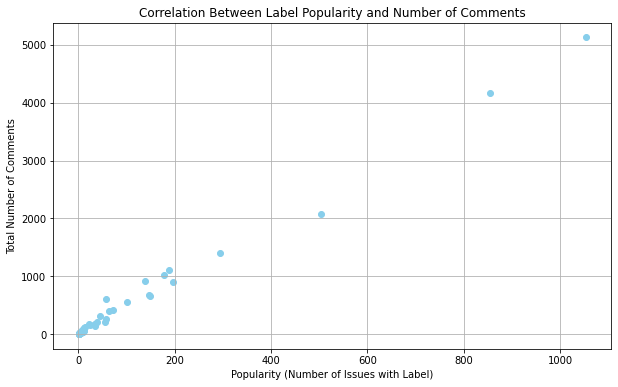

In [16]:
df_non_empty_labels = df[df['labels'].apply(lambda x: len(x) != 0)]
df_exploded = df_non_empty_labels.explode('labels')
total_comments_per_label = df_exploded.groupby('labels')['comments'].sum()
popularity_per_label = df_exploded['labels'].value_counts()
label_stats = pd.DataFrame({
    'Total Comments': total_comments_per_label,
    'Popularity': popularity_per_label
})
label_stats.dropna(inplace=True)

correlation = label_stats.corr().loc['Total Comments', 'Popularity']
print(f"Correlation between the number of comments and label popularity: {correlation:.2f}")


plt.figure(figsize=(10, 6))
plt.scatter(label_stats['Popularity'], label_stats['Total Comments'], color='skyblue')
plt.xlabel('Popularity (Number of Issues with Label)')
plt.ylabel('Total Number of Comments')
plt.title('Correlation Between Label Popularity and Number of Comments')
plt.grid()

plt.savefig('../plots/Correlation Between Label Popularity and Number of Comments.png')
plt.show()